In [1]:

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime
# df = pd.read_csv('data/2020 Line 280 AVL report.csv')
df = pd.read_csv('data/2019 Line 280 AVL.csv')
df['Transit Date Month'] = df['Transit Date'].str.split('/',expand=True)[0]

bus_actual_runtime = df.groupby(['Bus Stop ID','Transit Date Month'])['Actual Run Time'].mean().reset_index()
bus_dwell_time = df.groupby(['Bus Stop ID','Transit Date Month'])['Dwell Time'].mean().reset_index()
df['Difference (Minutes)'] = df['Difference (Minutes)'].abs()
scheduled_departure_offset = df.groupby(['Bus Stop ID','Transit Date Month'])['Difference (Minutes)'].mean().reset_index()


C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

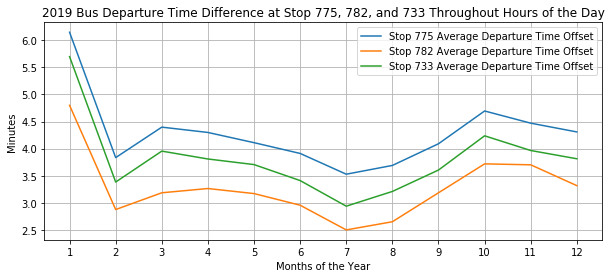

In [2]:
stopactual = scheduled_departure_offset.loc[scheduled_departure_offset['Bus Stop ID'] == 775]

stopactual['Transit Date Month'] = stopactual['Transit Date Month'].astype(int)
stopactual = stopactual.sort_values(by=['Transit Date Month'])
stopactual['Transit Date Month'] = stopactual['Transit Date Month'].astype(str)

fig, ax = plt.subplots(figsize = (10,4))
plt.plot(kind="line")
ax.set(Title="2019 Bus Departure Time Difference at Stop 775, 782, and 733 Throughout Months of the Year", xlabel="Months of the Year", ylabel="Minutes")
# plt.ylim(0,15)

plt.plot(stopactual['Transit Date Month'], stopactual['Difference (Minutes)'], label = 'Stop 775 Average Departure Time Offset')


stopactual = scheduled_departure_offset.loc[scheduled_departure_offset['Bus Stop ID'] == 782]

stopactual['Transit Date Month'] = stopactual['Transit Date Month'].astype(int)
stopactual = stopactual.sort_values(by=['Transit Date Month'])
stopactual['Transit Date Month'] = stopactual['Transit Date Month'].astype(str)

plt.plot(stopactual['Transit Date Month'], stopactual['Difference (Minutes)'], label = 'Stop 782 Average Departure Time Offset')


stopactual = scheduled_departure_offset.loc[scheduled_departure_offset['Bus Stop ID'] == 733]

stopactual['Transit Date Month'] = stopactual['Transit Date Month'].astype(int)
stopactual = stopactual.sort_values(by=['Transit Date Month'])
stopactual['Transit Date Month'] = stopactual['Transit Date Month'].astype(str)

plt.plot(stopactual['Transit Date Month'], stopactual['Difference (Minutes)'], label = 'Stop 733 Average Departure Time Offset')

locs, labels = plt.xticks() 

plt.grid()
plt.legend()
plt.show()
